# Southern Water Corp Case Study

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

In [132]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 

In [157]:
# Read in csv files
df_raw = pd.read_csv(r"C:\Users\User\Jupyter Projects\swc_python_case_study\DF_Raw_Data.csv")
df_std = pd.read_csv(r"C:\Users\User\Jupyter Projects\swc_python_case_study\DF_Rolling_Stdev.csv")

In [8]:
df_raw.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,41.802629,41.796702,90.796576,202.851610,50.226661,3.540897,76.015149,0.021199
std,3.656576,3.654873,10.217885,22.683977,5.298203,0.579055,6.651633,0.144075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.050000,41.000000,85.000000,191.000000,48.000000,3.220000,74.560000,0.000000
50%,42.100000,42.140000,91.000000,203.000000,51.000000,3.480000,76.620000,0.000000
75%,43.140000,43.130000,97.000000,215.000000,53.000000,3.780000,78.470000,0.000000
max,45.900000,45.840000,124.000000,264.000000,65.000000,7.560000,83.450000,1.000000


In [9]:
df_std.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.00000,2452.000000,2452.000000
mean,1.485126,1.497361,6.648308,13.945338,3.436370,0.37060,2.725232,0.021207
std,2.294950,2.282053,5.722897,12.394302,3.043042,0.29979,4.186723,0.144104
min,0.380000,0.640000,0.580000,5.000000,0.900000,0.11000,1.170000,0.000000
25%,1.070000,1.080000,5.520000,11.210000,2.920000,0.28000,1.960000,0.000000
50%,1.160000,1.170000,5.990000,12.180000,3.160000,0.32000,2.120000,0.000000
75%,1.230000,1.260000,6.460000,13.110000,3.370000,0.36000,2.270000,0.000000
max,21.390000,21.530000,59.310000,124.710000,30.650000,3.32000,39.150000,1.000000


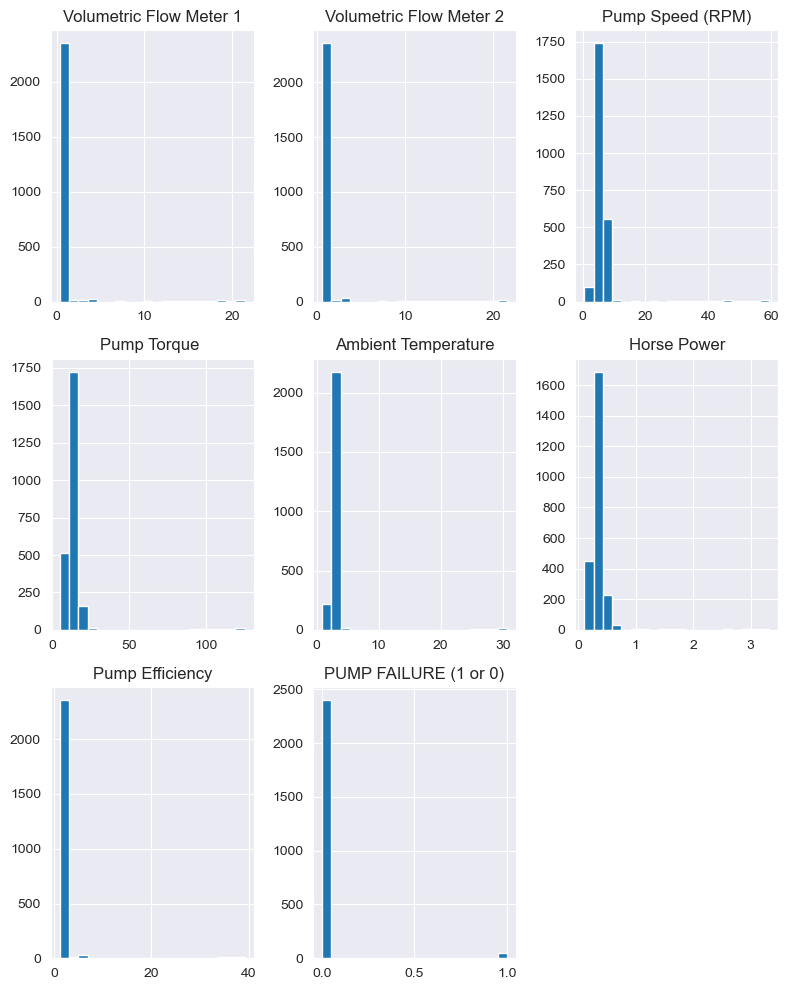

In [18]:
df_std.hist(figsize=(8,10), bins=20)
plt.tight_layout()
plt.show()

#### While the raw dataset has a number of metrics showing the std dev at about 10% of the mean value, horsepower actually shows the most variability relative to the mean value at 16% of the mean value. 
#### Interestingly enough, the variability in the std dev dataset is much higher, with std dev values relatively similar to the mean values.

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

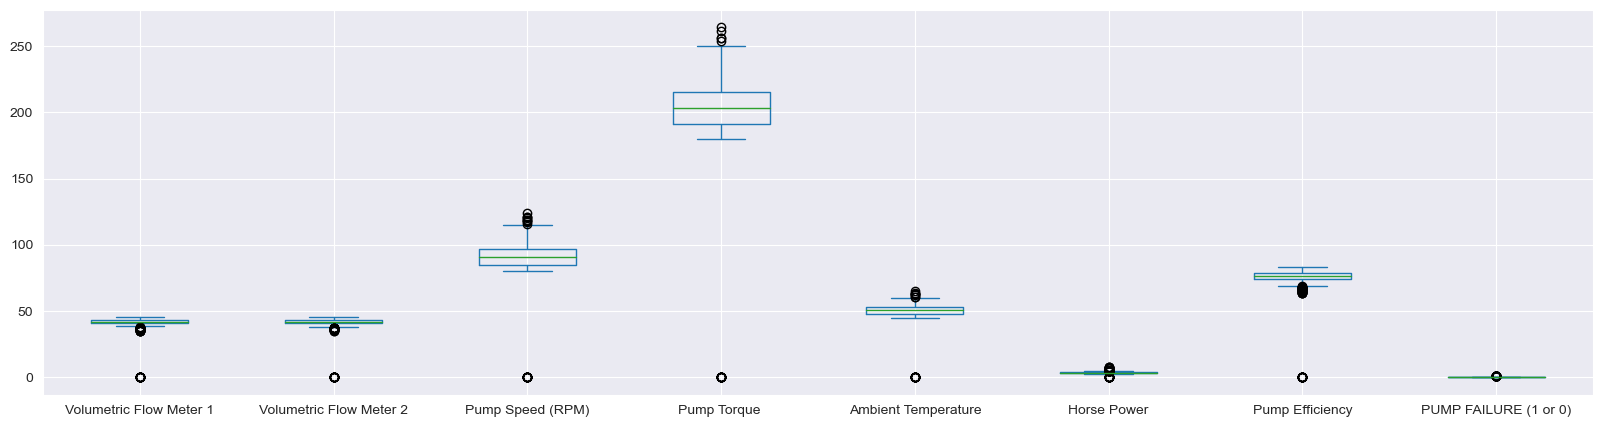

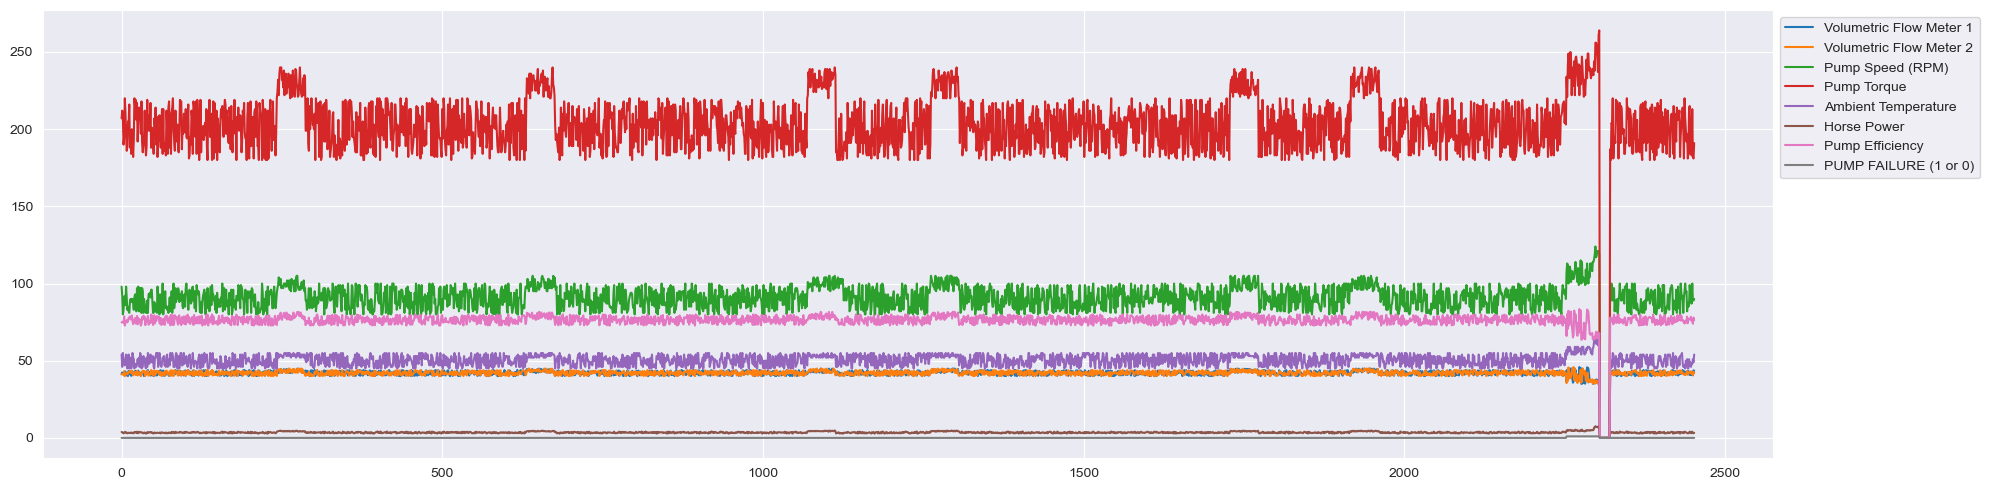

In [42]:
# Plot the raw data metrics represeted in a box plot to capture outliers

# Create boxplot
df_raw.plot(kind='box')

# Show line plot 
df_raw.plot(kind='line')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

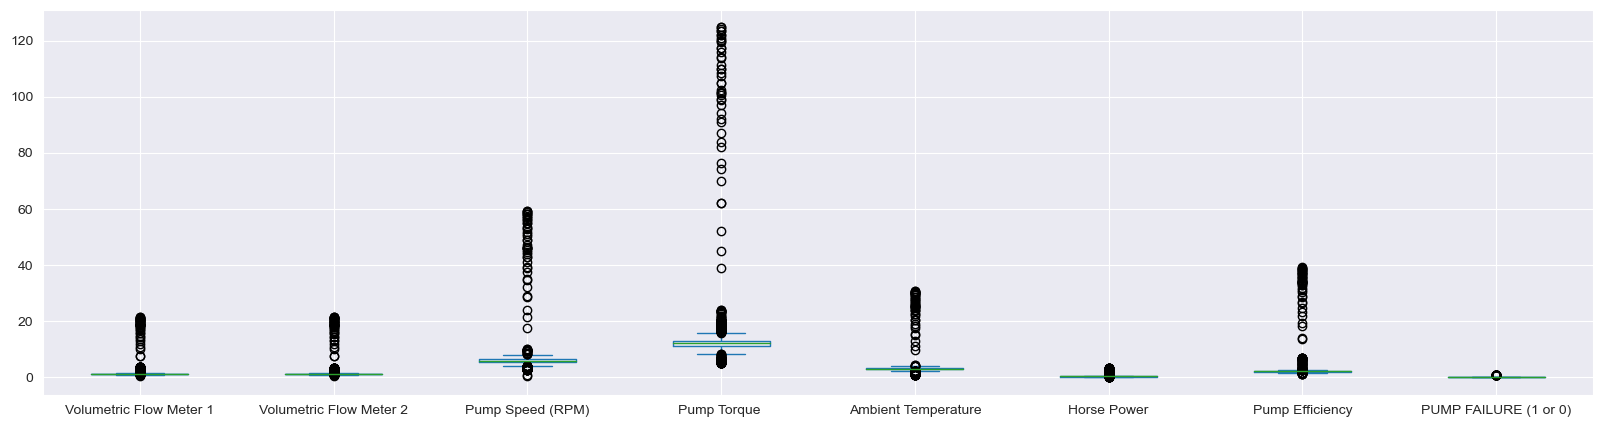

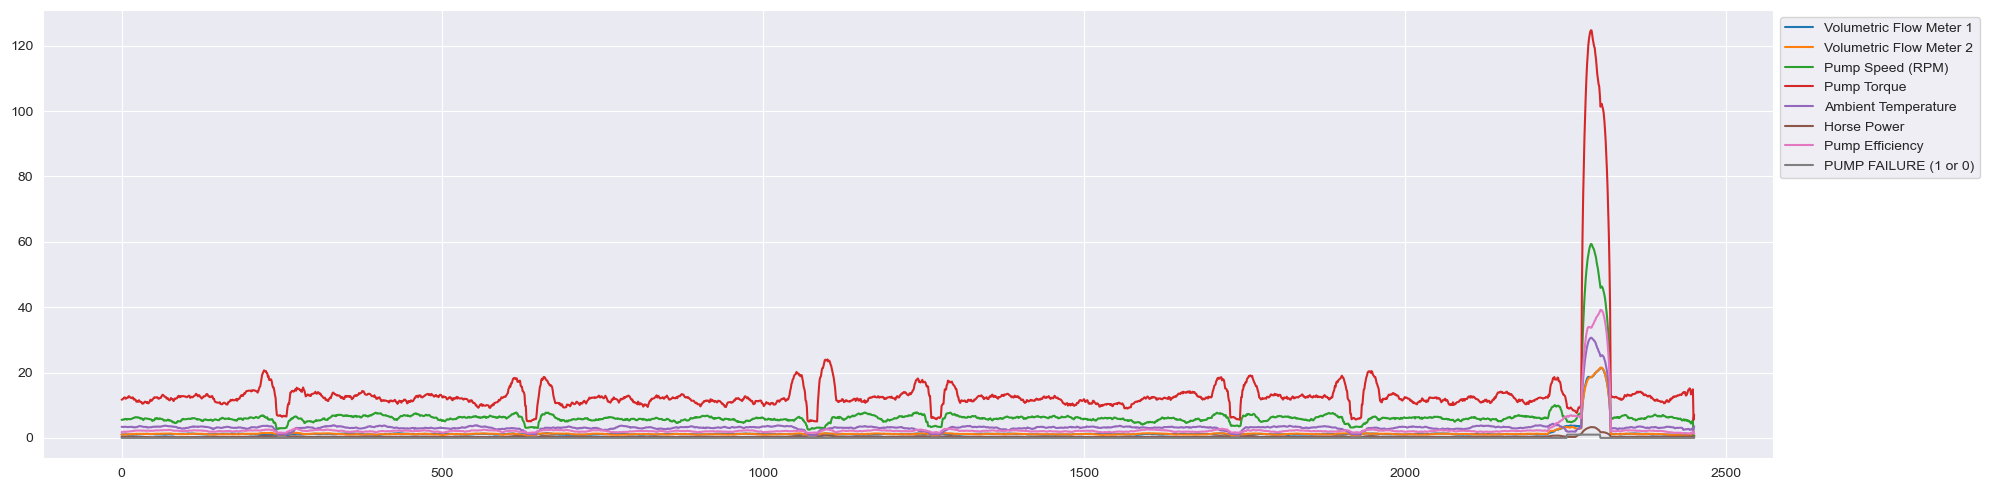

In [44]:
# Plot the std dev data metrics represeted in a box plot to capture outliers
df_std.plot(kind='box')
df_std.plot(kind='line')
plt.legend(loc='upper left', bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

#### The line plot for the raw data denotes several variables showing high ranges of value variability relative to the mean, pump torque and pump speed being the most visibly apparent. Confirmed by the outliers noted in the box plot.
#### The box plot for the std dev data confirms larger variability noticable, as denoted by the many outliers above the upper whisker. Pump speed and Pump Torque showing the highest variablity and largest outlier values. The benefit of the std dev line plot being the noise reduction and ease of distiction for variable contribution to pump failure.

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered DataFrames with Box Plots</span> 


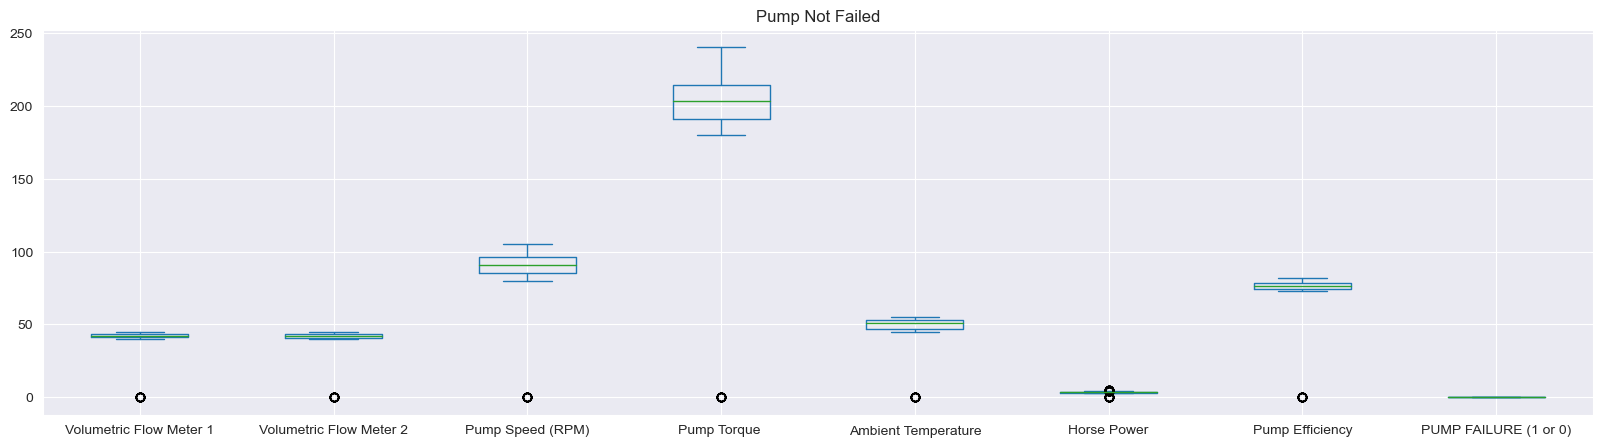

In [56]:
# Diplay the data when the pump has not failed
df_raw_0 = df_raw[df_raw['PUMP FAILURE (1 or 0)'] == 0]
df_raw_0.plot(kind = 'box')
plt.title('Pump Not Failed')
plt.show()

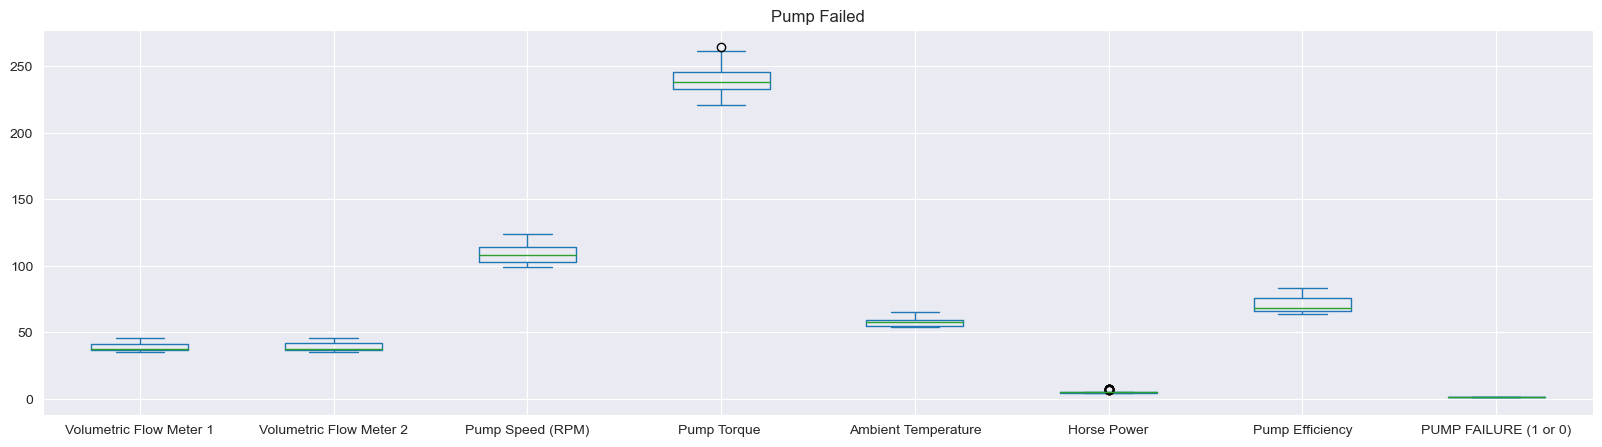

In [55]:
# Diplay the data when the pump has failed
df_raw_1 = df_raw[df_raw['PUMP FAILURE (1 or 0)'] == 1]
df_raw_1.plot(kind = 'box')
plt.title('Pump Failed')
plt.show()

#### When the pump has not failed, the variables show consistent values. Pump torque and speed have the highest IQRs of all the variables.
#### When the pump has failed, the IQRs cluster tightly by outliers are noted. While the IQRs cluster togetehr more tightly, they also increase notably for pump speed and torque.

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Create Quartiles</span> 

In [58]:
Q1 = df_raw.quantile(0.25, numeric_only=True)
Q3 = df_raw.quantile(0.75, numeric_only=True)

In [61]:
Q1

Volumetric Flow Meter 1     41.05
Volumetric Flow Meter 2     41.00
Pump Speed (RPM)            85.00
Pump Torque                191.00
Ambient Temperature         48.00
Horse Power                  3.22
Pump Efficiency             74.56
PUMP FAILURE (1 or 0)        0.00
Name: 0.25, dtype: float64

In [62]:
Q3

Volumetric Flow Meter 1     43.14
Volumetric Flow Meter 2     43.13
Pump Speed (RPM)            97.00
Pump Torque                215.00
Ambient Temperature         53.00
Horse Power                  3.78
Pump Efficiency             78.47
PUMP FAILURE (1 or 0)        0.00
Name: 0.75, dtype: float64

In [63]:
    IQR = Q3 - Q1
IQR

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64

---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

In [102]:
# Align the DataFrame and Series objects
aligned_df, lower_limit = df_raw.align(lower_limit, axis=1, copy=False)
aligned_df, upper_limit = df_raw.align(upper_limit, axis=1, copy=False)

# Find the outliers
outliers_mask = ((aligned_df < lower_limit) | (aligned_df > upper_limit)).any(axis=1)
outliers = aligned_df[outliers_mask]

# Calculate percentage of outliers
percentage_outliers = str(round((len(outliers) / len(df_raw)) * 100, 2)) + "%"
percentage_outliers

'3.87%'

#### The significance of removing outliers from the dataset depends on the context of the analysis. For the case of model training, removing outliers could present potentially more accurate for predictions and pattern recognition.
#### However, if the focus of the analysis were to use the outliers for detection of a certain phemenon, in this case pump failure, then we may want to use the outlier observations.

---------------------------------------------------------------------------

### Step 7: <span style="color:green">Create a box plot without outliers</span> 

In [114]:
# Invert the boolean on the outlier mask and assign it as the new condition for removing outliers
no_outliers_mask = ~outliers_mask

# Apply the no-outliers condition to the original data and assign it to a new variable
no_outliers = df_raw[no_outliers_mask]

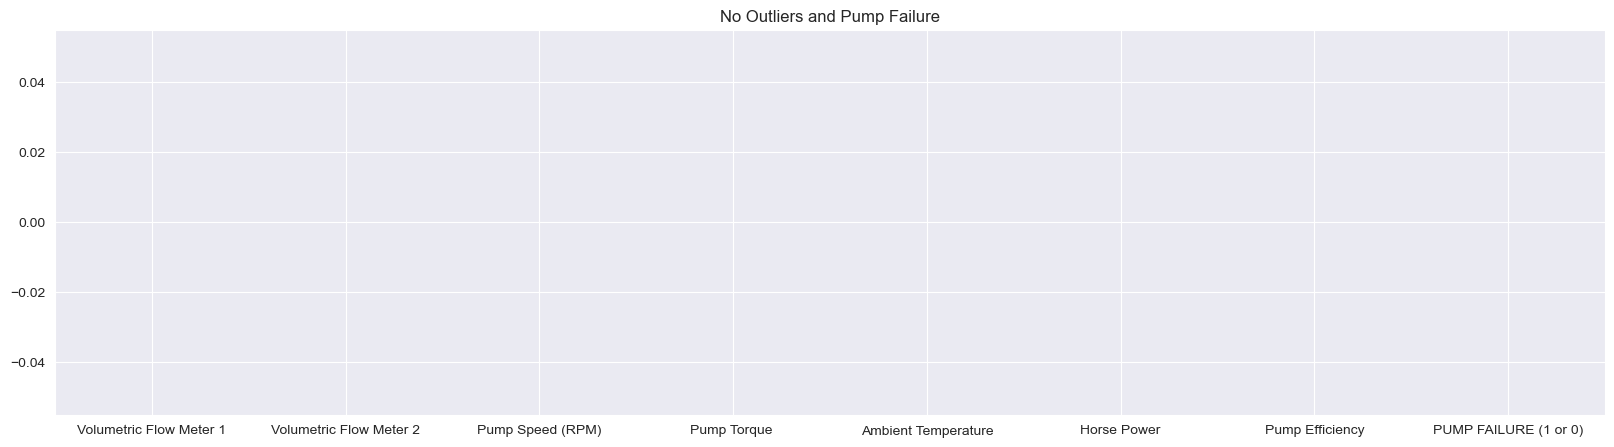

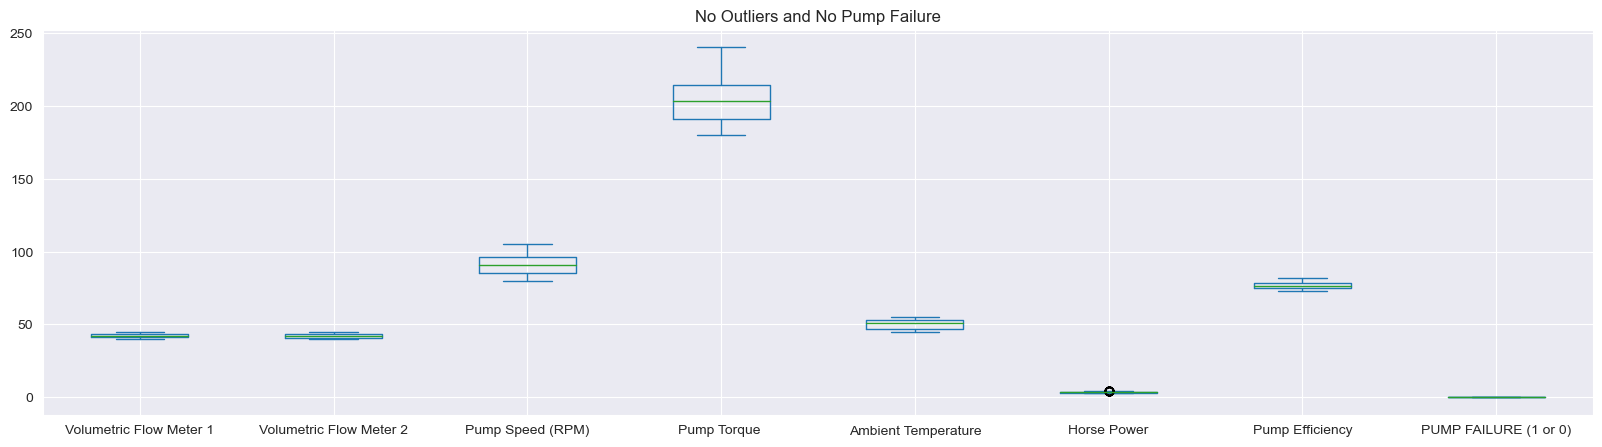

In [117]:
# Show the dataset without outliers when the pump has failed
no_outliers_1 = no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 1]

# Show the dataset without outliers when the pump has not failed
no_outliers_0 = no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 0]

# Plot the data with and without the presence of pump failure with the outliers removed
no_outliers_1.plot(kind='box')
plt.title('No Outliers and Pump Failure')
no_outliers_0.plot(kind='box')
plt.title('No Outliers and No Pump Failure')
plt.show()

#### The lack of data present to visualize the outliers during pump failure is to be expected. This is because the presence of outliers are indicative of pump failure, therefor if we remove the presence of outliers then there will be no data present during pump failure.

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 

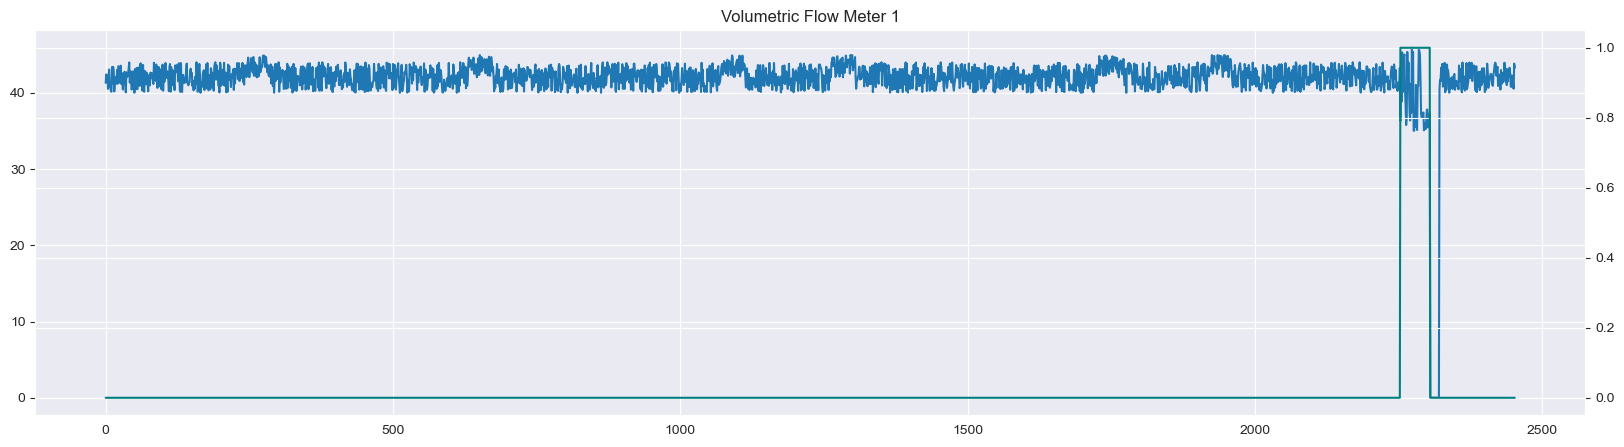

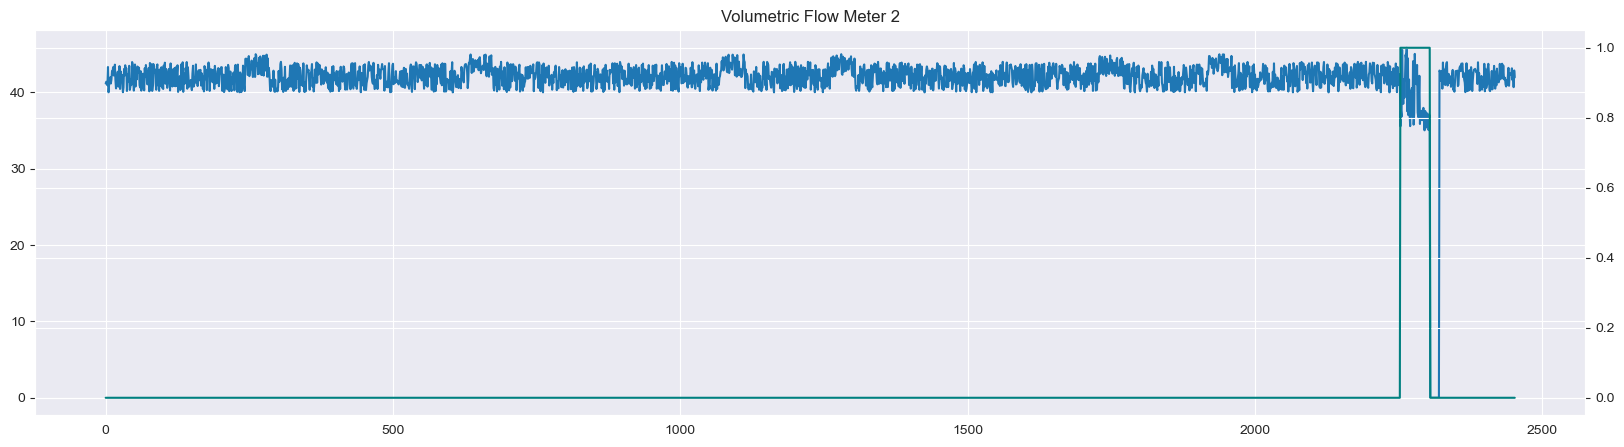

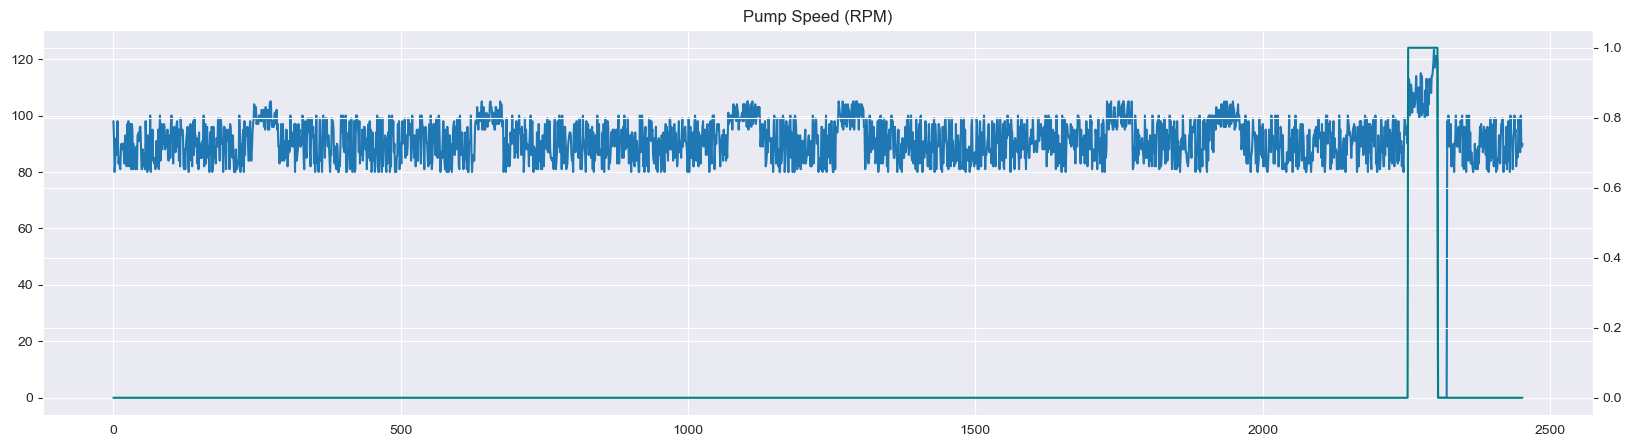

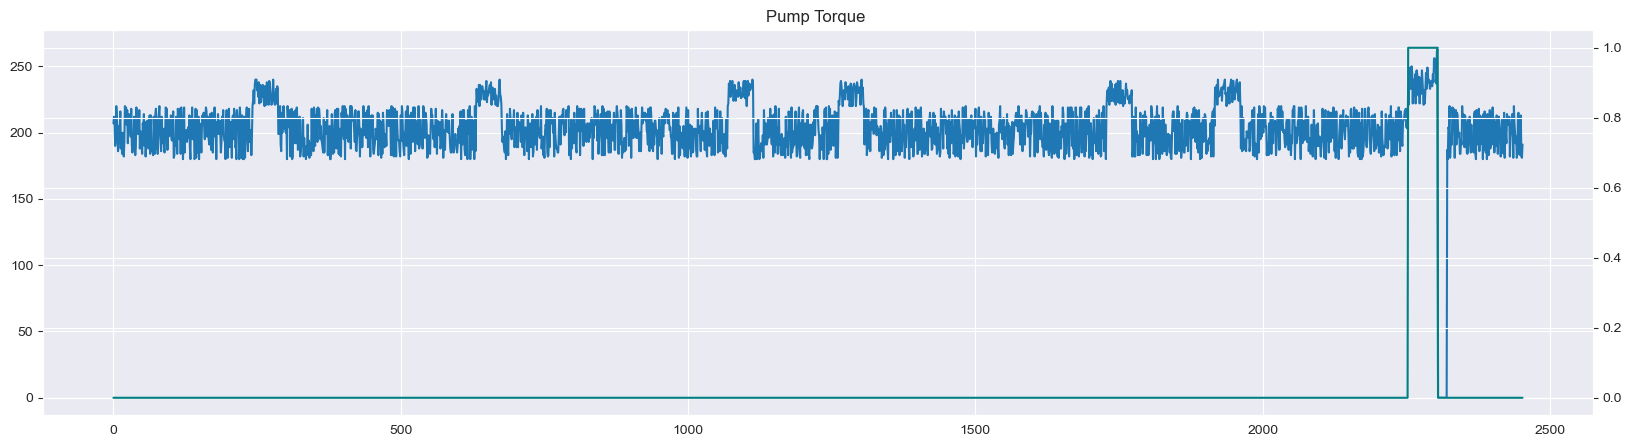

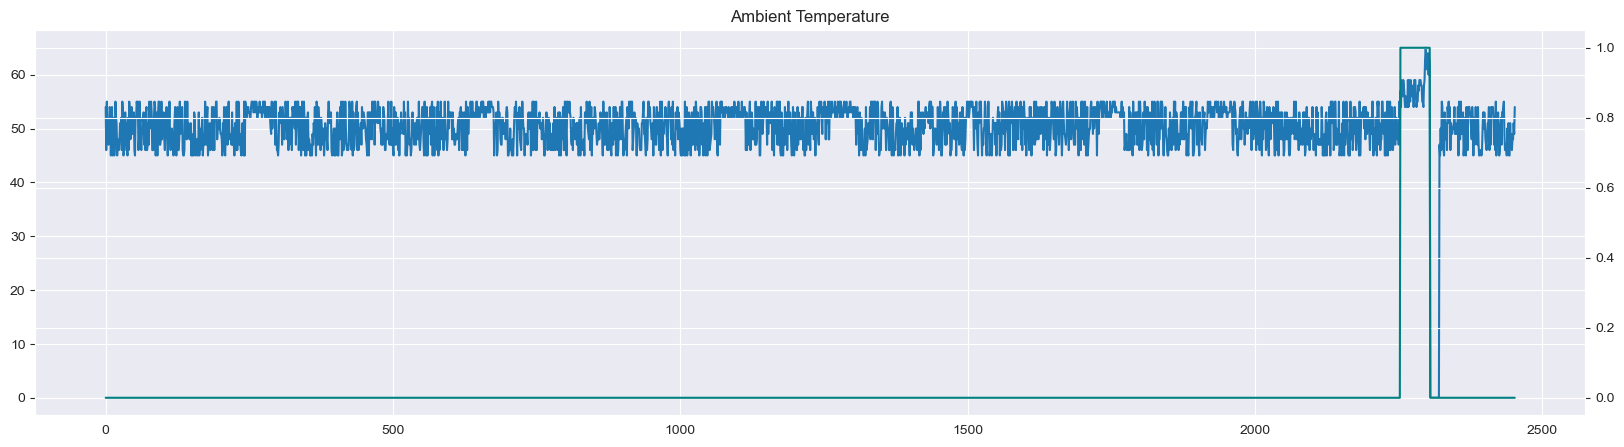

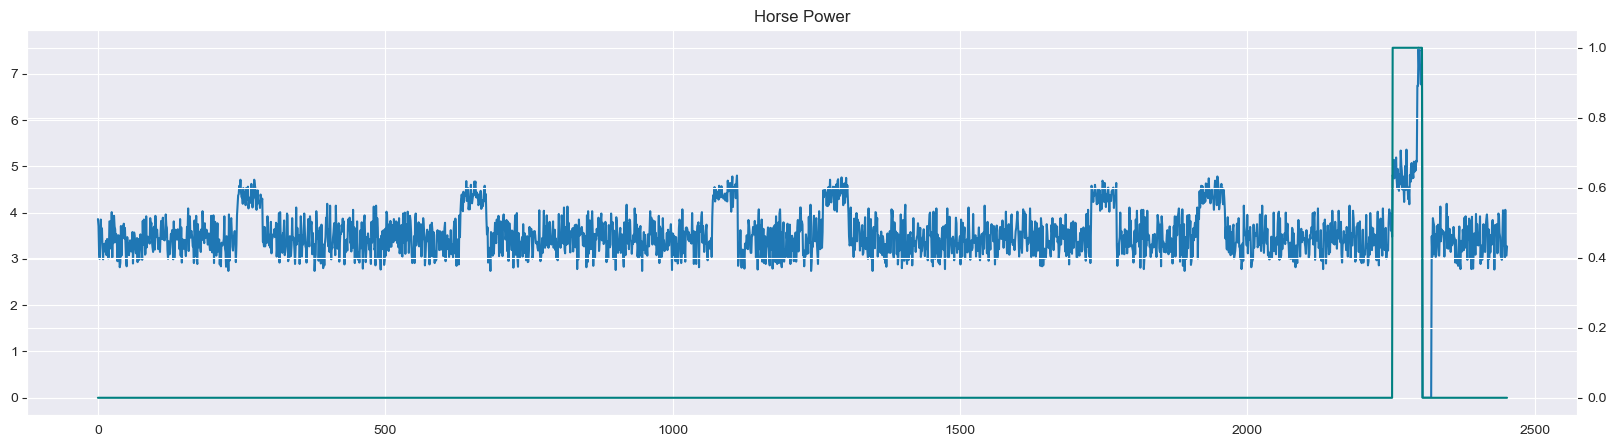

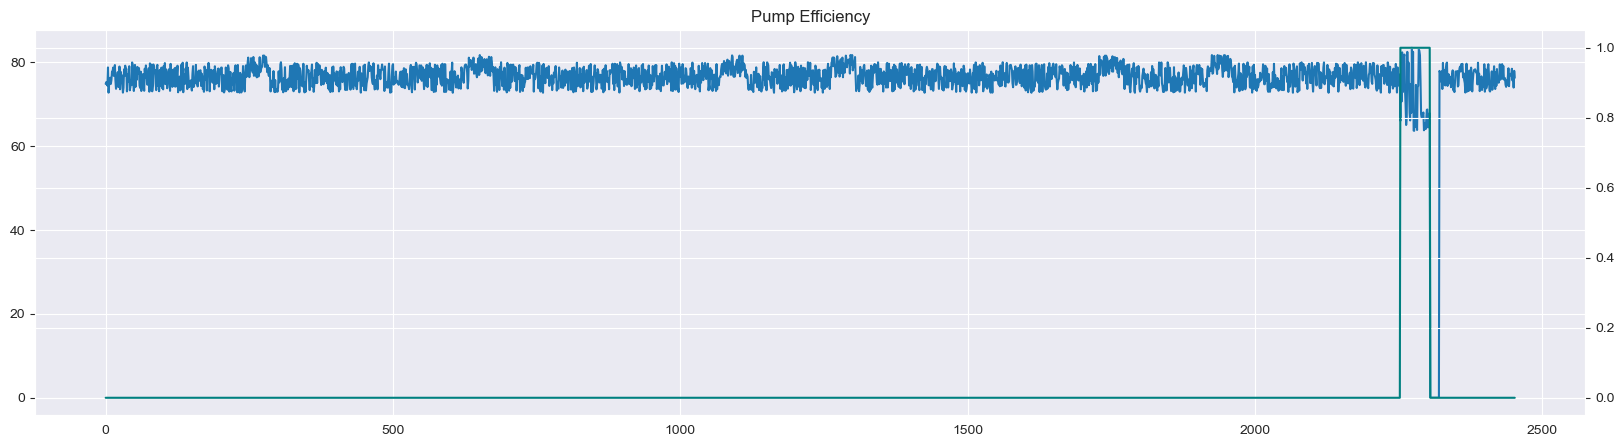

In [145]:
# Get only numeric columns from the dataframe
numeric_columns = list(df_raw.select_dtypes(include=[np.number]).columns)

# Drop the redundant pump failure chart
del numeric_columns[-1]

# Loop the mapping and plotting of the column for each column name in the list
for item in numeric_columns:
    axis_1 = df_raw[item].plot(kind='line')
    axis_2 = axis_1.twinx()
    plt.title(item)
    axis_2.plot(df_raw["PUMP FAILURE (1 or 0)"], color = 'teal')
    plt.show()

#### Viewing each variable plotted individually makes it easier to see higher variability of some variables during pump failure. For example, Horse Power and Pump Torque both display relatively higher levels of variablity furing pump failure.

<h3>  <span style="color:green">This is where we will switch to using the dataframe_stdev that you had previously defined in Q1, dataframe_stdev </span> </h3>

---

### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

ii) Using the List_Of_Variables you created in Step 8, Re-plot all the numerical variables in the dataframe_stdev for the following time periods:
     10/12/2014 12:00 to 10/12/2014 14:30.

Please ensure you set the secondary axes as the Pump Failure Variable so you can observe how the variables move with respect to Pump Failure. 

    for item in ListOfVariables:
        first_axis = dataframe[___].plot #We are looping through every item in the dataframe.
        first_axis.xaxis.set_major_locator(plt.MaxNLocator(10)) #This will ensure we only plot a maximum of 10 Time Stamps
        second_axis = first_axis.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
        second_axis.plot(dataframe['ColumnOfInterest'], color='orange')
        second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
        plt.title(item)
        plt.show()

<b>Note: To filter on the time period you will need to make use of the below syntax which *should* be familiar to you as you are subsetting your DataFrame, but instead of on a column, you're subsetting a time period. </b>

    dataframe_time_filtered = dataframe[(dataframe.index >= "_____") & (dataframe.index <= "_____")]


In [159]:
dated_std = df_std.set_index('TIMEFRAME (DD/MM/YYYY)')

In [164]:
std_time_filtered = dated_std[(dated_std.index >= '10/12/2014 12:00') & (dated_std.index <= '10/12/2014 14:30')]

,Data Source,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
TIMEFRAME (DD/MM/YYYY),,,,,,,,,
10/12/2014 12:00,Rolling Stdev (30 Minute),1.10,1.13,6.21,13.74,3.30,0.31,2.05,0
10/12/2014 12:01,Rolling Stdev (30 Minute),1.13,1.13,6.29,13.51,3.30,0.31,2.05,0
10/12/2014 12:02,Rolling Stdev (30 Minute),1.13,1.14,6.21,13.68,3.36,0.31,2.07,0
10/12/2014 12:03,Rolling Stdev (30 Minute),1.13,1.16,6.30,13.59,3.29,0.32,2.10,0
10/12/2014 12:04,Rolling Stdev (30 Minute),1.13,1.20,6.47,13.19,3.21,0.31,2.17,0
...,...,...,...,...,...,...,...,...,...
10/12/2014 14:26,Rolling Stdev (30 Minute),21.39,21.53,46.10,101.84,25.21,1.75,39.14,0
10/12/2014 14:27,Rolling Stdev (30 Minute),21.38,21.44,46.34,102.22,25.28,1.78,38.99,0
10/12/2014 14:28,Rolling Stdev (30 Minute),21.24,21.31,46.09,101.28,25.29,1.76,38.74,0


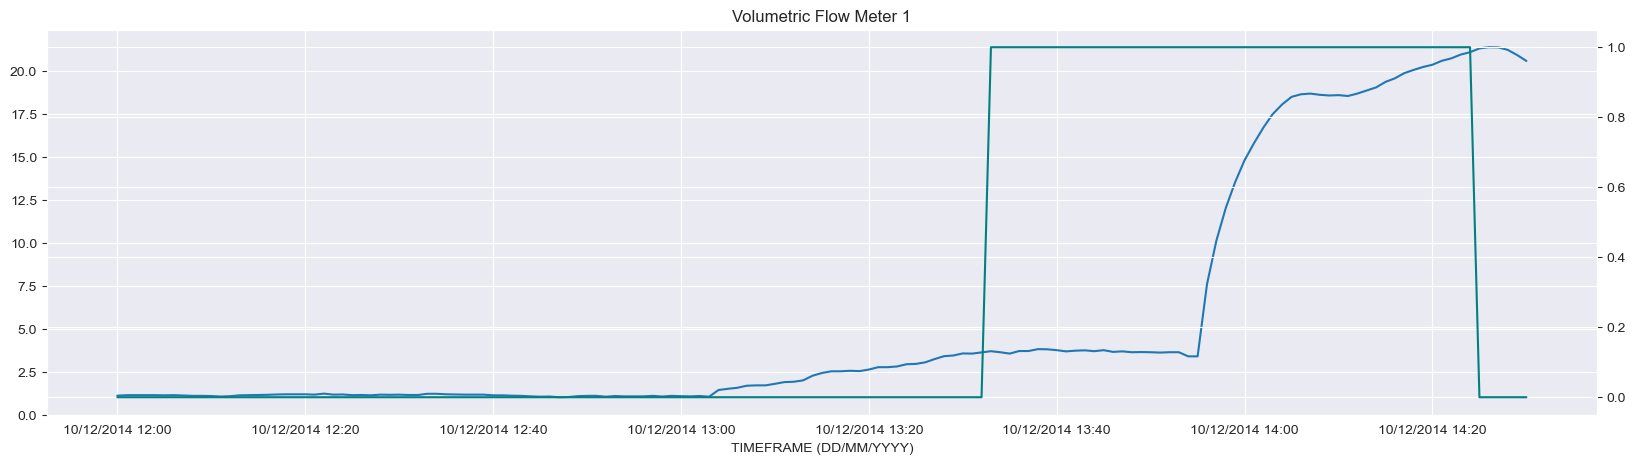

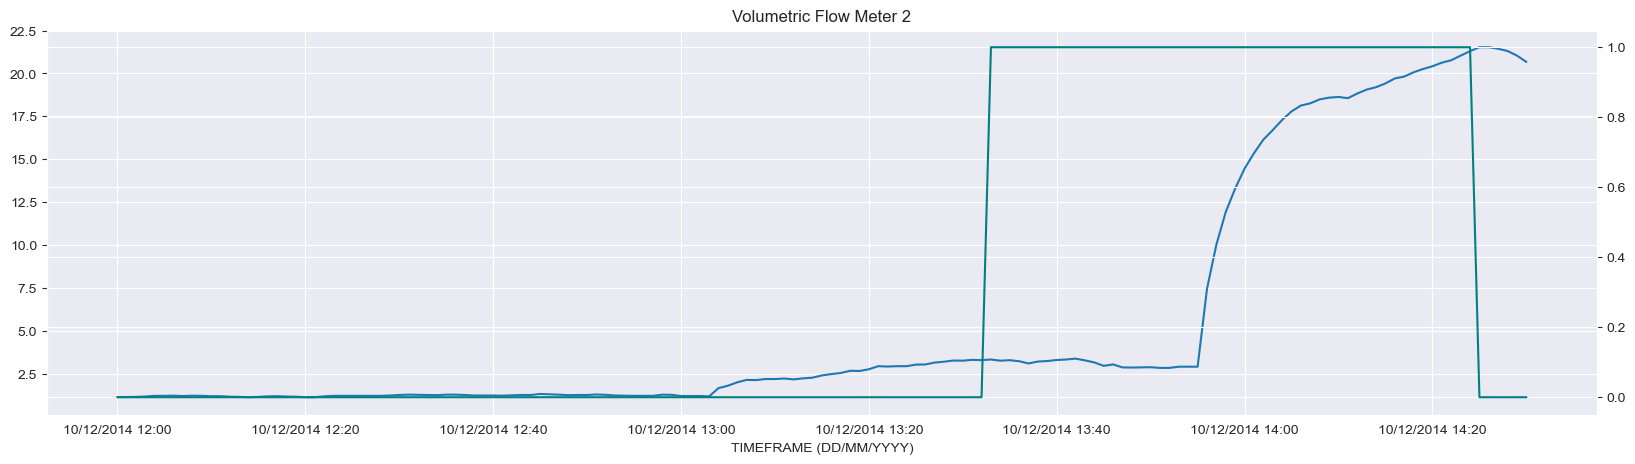

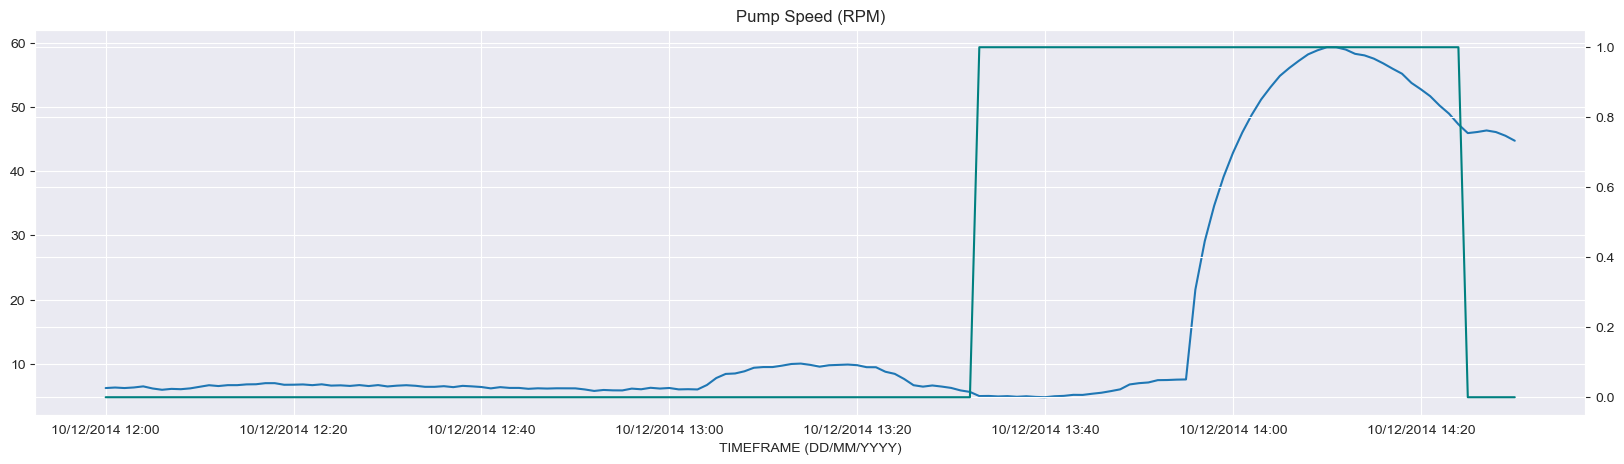

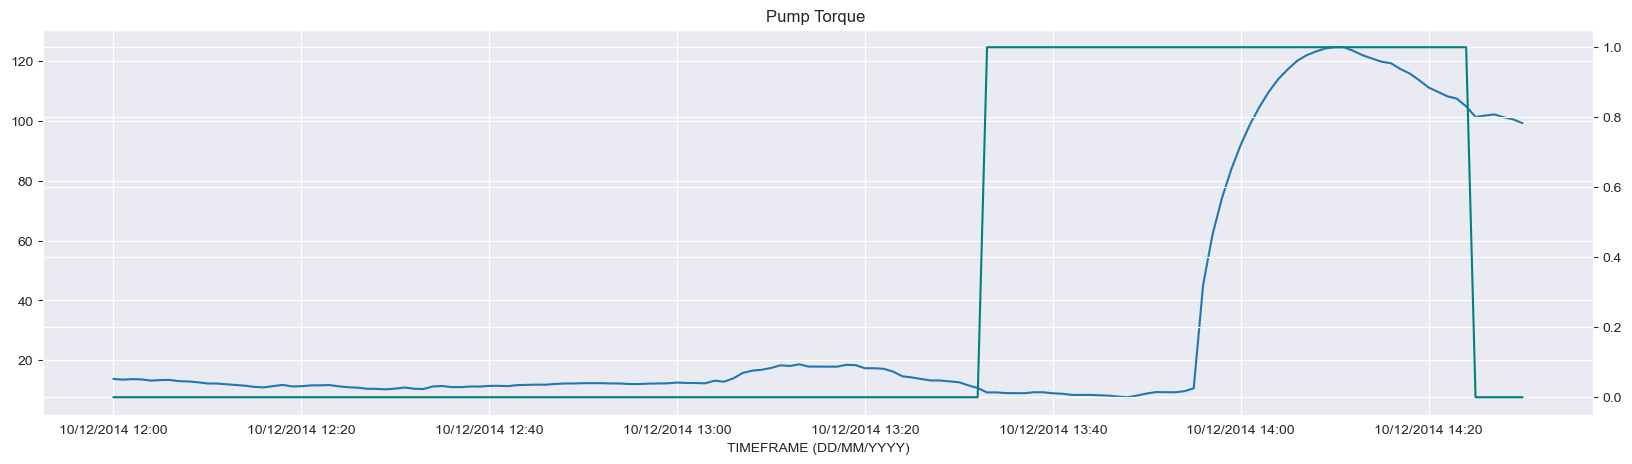

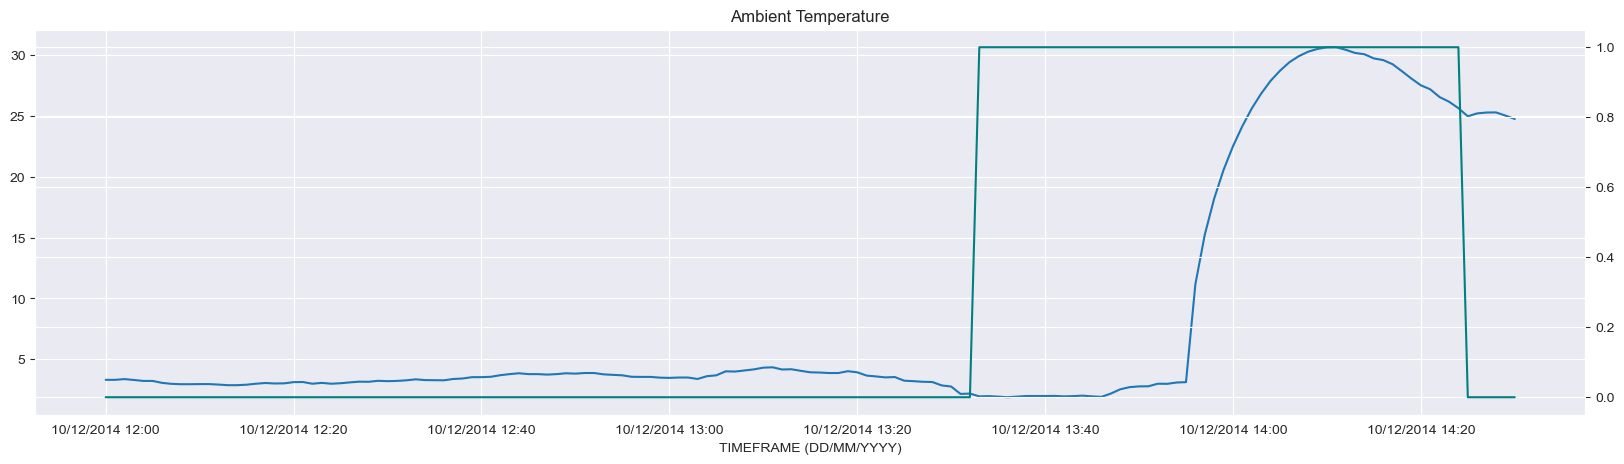

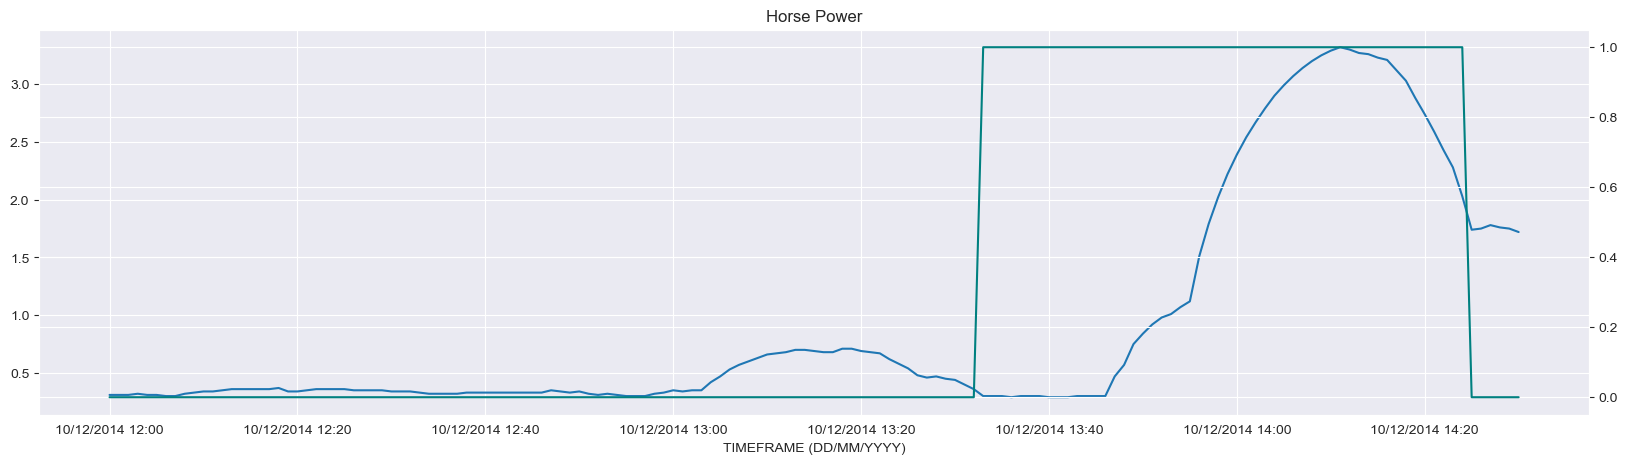

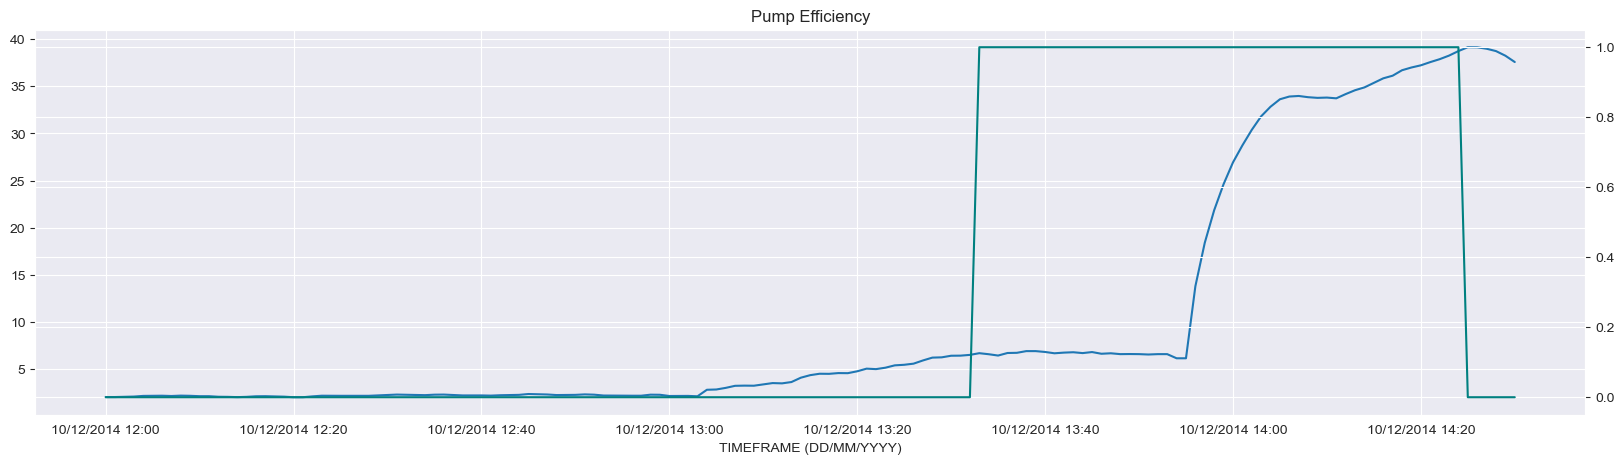

In [165]:
# Loop the mapping and plotting of the column for each column name in the list
for item in numeric_columns:
    axis_1 = std_time_filtered[item].plot(kind='line')
    axis_2 = axis_1.twinx()
    plt.title(item)
    axis_2.plot(std_time_filtered["PUMP FAILURE (1 or 0)"], color = 'teal')
    plt.show()

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

When you performed inferential statistics for Southern Water Corp using Excel, you made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights. 

### Step 10: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the dataframe_raw dataset.

The syntax of Seaborn takes the following arguments:

<a href = https://seaborn.pydata.org/generated/seaborn.heatmap.html> sns.heatmap(correlated_dataframe, annot=True) </a>

You'll need to ensure you use the following <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html>.corr() </a>  function and apply this to your dataframe first, <b> before </b> passing this to the sns.heatmap() function.

## Please put your code here

#### We've included an example of what the output *may* look like below

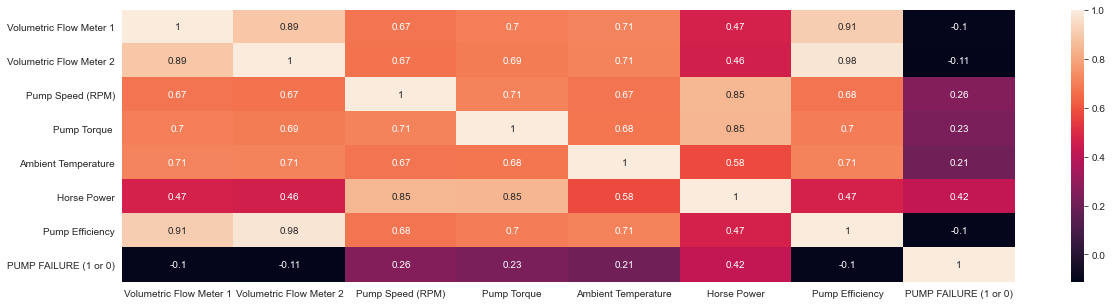

**Which variables seem to correlate with Pump Failure?**



### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
<b> i) Using the correlated DataFrame you created earlier, create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order. </b>

You'll have to think carefully regarding this question.

You'd know that you can get the correlation values from the following command:

    dataframe.corr()
    
Upon printing this out, you should get a **DataFrame** that looks like the below:


,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000


You might think to yourself this looks **suspiciously like a DataFrame with columns that you can manipulate**.

You can.

With this hint in mind, you should be able to **select the relevant column of interest and combine this with the .plot(kind='__') function to answer the question**. Don't forget to think about .sort_values() to help sort your data!

### Please put your code here

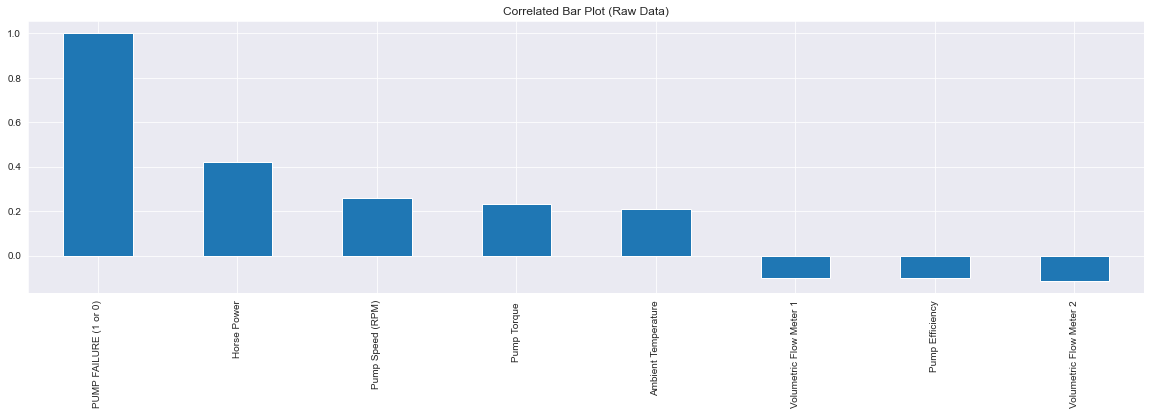

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, you created a correlation matrix using 'raw' variables. We saw *some* correlations with the raw data but they weren't necessarily as strong as we would have liked. This time, we'll recreate a Heatmap using the dataframe_stdev dataset you had imported in Step Two. 

<b> i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R) for all variables using the dataframe_stdev dataset. </b>


## Please put your code here

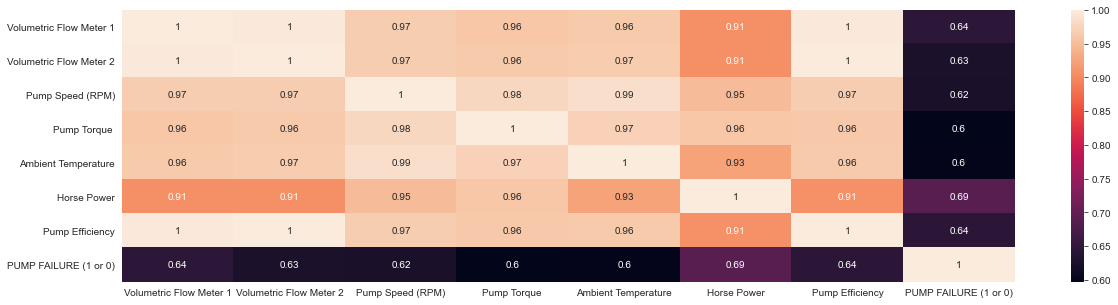

<b> Do any variables stand out? If yes, list these out below your heatmap. </b>

### Creating a Multivariate Regression Model


When you worked on this case study in Excel, you went through the tricky process of using the rolling standard deviation variables to generate a regression equation. Happily, this process is much simpler in Python.  

For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 13: <span style="color:purple">Use OLS Regression</span> 
<b> i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables in the dataframe_raw dataset. </b>

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken. We have demonstrated this below:

<b> Don't forget to reimport the DataFrames you've previously imported in Step 2 before starting these steps </b> 

    1. Establish two DataFrames named, independent_variables and dependent_variables. The independent variables are known as explanatory variables - they help EXPLAIN what you are trying to model. Dependent Variable on the other hand is the variable of interest that you want to MODEL. In this case, the Dependent Variable is Pump Failure (1 or 0).
    
    2. Add a constant to your Independent Dataframe via the following syntax:
    independent_variables = sm.add_constant(independent_variables). This will simply add a constant stream of 1's in a column to your dataframe. This constant is used to account for bias in the model.  
    
    3. Store and Fit your model with the below syntax:
    regression_model = sm.OLS(dependent_variable,independent_variable).fit() 
    
    4. Print the regression_model.summary() to view the Regression Statistics 


<b> ii) Repeat i) but this time use the dataframe_stdev you imported previously.</b>

You will repeat the same steps as you have done in i) only you will be changing the dataset from dataset_raw to dataset_stdev. 


## Please put your code here 

In [ ]:
#Dataframe_Raw

In [ ]:
#Dataframe_Stdev

<h4> <b> Compare the Models you've created and observe the R Squared displayed for each model. Which model seems better and why? Put your thoughts down below.  </b> If you're not sure how to answer this, you should reference the resource <a href = https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit> here </a> for a more detailed explanation.



### Step 14: <span style="color:purple">Analysis of Coefficients </span>

Great job creating those regressive equations! You've reached the final two steps of this case study!

You've identified that *one* regressive model has a better fit than the previous model.

Using this model, we want to **extract** the co-efficients to better understand the variables that display the largest *absolute* rate of change with respect to Pump Failure. We'll use the co-efficients to better assess this from an *absolute* rate of change perspective. (i.e. Which variables spike the most in relation to Pump Failure?)

<b> i) Using the .params method, extract the Coefficients from your regression_model and create a bar plot that identifies which coefficients react most strongly with respect to Pump Failure. Which three (3) variables seem to showcase the
strongest 'relationship' with respect to Pump Failure? </b>

You can use params via the following syntax:

    model.params where model represents the name of the regression model you've created.

We've included an example below that showcases what your chart should look like upon completion of this exercise. 



## Please put your code here

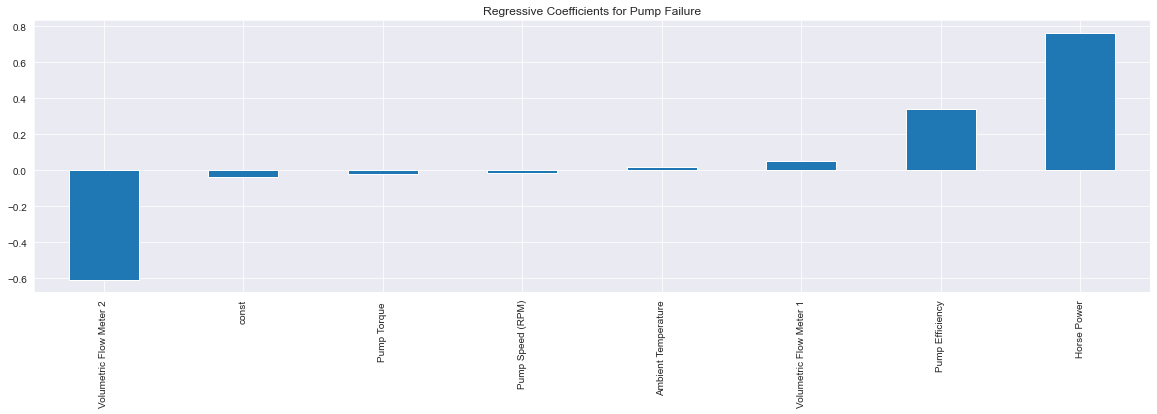

<h3> <span style="color:orange"> Please note that Step 15 is a Challenge Questions and will intentionally be more difficult </h3> 


### Step 15: <span style="color:purple">Validate Predictions</span> 

Now it's time for us to <b> validate our predictions. </b>
    
Once you've created a regressive_model, you can call this using the following syntax:

        regressive_model.predict(independent_variables). 
        
Extra information regarding how this works can be found <a href = https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html> here </a>

<b> 
i) Create a new column in the dataframe_stdev, called, 'Prediction'. 
    
ii) Use the regression equation you created in the previous step and apply the .predict() function to the independent variables in the dataframe_stdev dataset so you get a column full of your regressive predictions.
    
iii) Create a Dual-Axis Plot with the following axes items: <p>
    
        Axes One would contain: Volumetric Flow Meter 2, Pump Efficiency and Horse Power 
        Axes two would contain: Pump Failure (1 or 0) and Prediction
</b>


**Note:** Don't forget how to use .twinx() to help you out with the dual axis!

We've included an example below of how your chart might look once you're done!

## Please put your code here

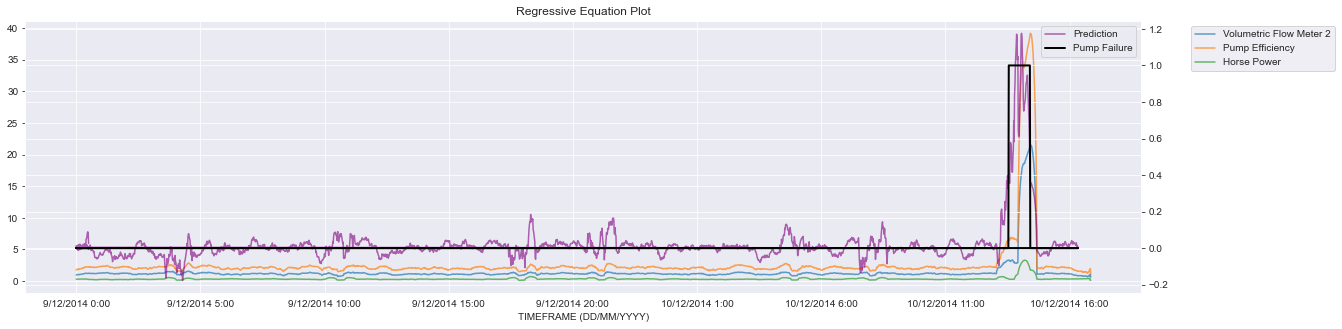

<h3> You've made it to the end of this challenging case study — well done! </h3>

You've learnt to perform a number of new opeartions in Python.

You're now able to:

<li> Create Line Plots and Box Plots </li>
<li> Understand Descriptive Statistics from the .describe() functions </li>
<li> Detect and Remove Outliers from your Dataset </li>
<li> Subset and Filter your DataFrames </li>
<li> Use For Loops to smartly loop through data </li>
<li> Use Dual Axes to Plot Multiple Variables on different axes </li>
<li> Interpret Correlation Coefficients and Heatmaps </li>
<li> Create and assess the goodness of fit for your Linear Regression Models </li>

Well done! This is just the start of your foundation in Python as you grow more proficient in practicing against datasets both big and small.

Keep up the fantastic work and as always - if you have any questions, don't hesitate to reach out to the community, your mentor, or #slack channel for extra support!

<h3> Keep up the amazing work! </h3>
